### Supervised Learning-Regression

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Import Libraries

In [2]:
#data analysis
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import cross_validation
from sklearn import metrics
import sklearn.linear_model as lm

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load Data

In [3]:
veh = pd.read_csv("https://raw.githubusercontent.com/justicejanak/Stat-517/master/vehicles.csv")
veh.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [21]:
veh.shape

(39588, 83)

In [7]:
#veh.columns

### Visual Inspection of Data

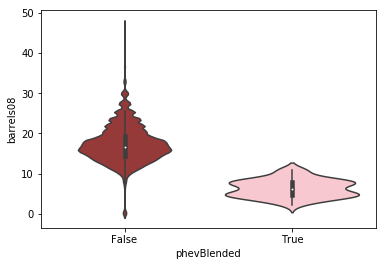

In [6]:
sns.violinplot("phevBlended", "barrels08", data=veh,
              palette=["brown", "pink"]);

From the plot above,truely vehicles that operate on a blend of gasoline and electricity in charge depleting mode (i.e. phevBlended) has less annual petroleum consumption in barrels for fuelType1 (i.e.barrels08 )  

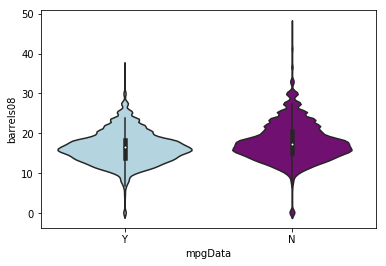

In [8]:
sns.violinplot("mpgData", "barrels08", data=veh,
               palette=["lightblue", "purple"]);

Also from the plot above, vehicle that has MPG data(i.e. mpgData) has less annual petroleum consumption in barrels for fuelType1 (i.e.barrels08 )  

### Preprocessing the Dataset


In [10]:
#Removing unwanted variables
veh_out = veh.drop([u'cityUF', u'co2',
       u'co2A', u'co2TailpipeAGpm', u'co2TailpipeGpm', u'comb08', u'comb08U',
       u'combA08', u'combA08U', u'combE', u'combinedCD', u'combinedUF', u'cylinders',
       u'displ', u'drive', u'engId', u'eng_dscr', u'feScore', u'fuelCost08',
       u'fuelCostA08', u'fuelType', u'fuelType1', u'ghgScore', u'ghgScoreA',
       u'highway08', u'highway08U', u'highwayA08', u'highwayA08U', u'highwayCD',
       u'highwayE', u'highwayUF', u'hlv', u'hpv', u'id', u'lv2', u'lv4', u'make',
       u'model', u'mpgData', u'phevBlended', u'pv2', u'pv4', u'range', u'rangeCity',
       u'rangeCityA', u'rangeHwy', u'rangeHwyA', u'trany', u'UCity', u'UCityA',
       u'UHighway', u'UHighwayA', u'VClass', u'year', u'youSaveSpend', u'guzzler',
       u'trans_dscr', u'tCharger', u'sCharger', u'atvType', u'fuelType2', u'rangeA',
       u'evMotor'],axis =1)
veh_out.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0,0.0,19,0.0,0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0,0.0,9,0.0,0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0,0.0,23,0.0,0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0,0.0,10,0.0,0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0,0.0,17,0.0,0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [11]:
veh_out.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'mfrCode',
       'c240Dscr', 'charge240b', 'c240bDscr', 'createdOn', 'modifiedOn',
       'startStop', 'phevCity', 'phevHwy', 'phevComb'],
      dtype='object')

In [12]:
veh_out.shape

(39588, 20)

In [13]:
#Converting createdOn and modifiedOn into vectors
vector = CountVectorizer()
X = vector.fit_transform(veh_out['createdOn'].values.astype('str'))
createdOn = pd.DataFrame(X.toarray(), columns=vector.get_feature_names())
X = vector.fit_transform(veh_out['modifiedOn'].values.astype('str'))
modifiedOn = pd.DataFrame(X.toarray(), columns=vector.get_feature_names())

In [14]:
#Merging the variables
veh_mer = pd.merge(veh_out, createdOn, left_index=True, right_index=True)
veh_merg = pd.merge(veh_mer, modifiedOn, left_index=True, right_index=True)
veh_merg_dr = veh_merg.drop(['createdOn','modifiedOn'], axis = 1)

In [15]:
veh_dum = pd.get_dummies(veh_merg_dr, columns =[u'mfrCode',
       u'c240Dscr', u'c240bDscr', u'startStop'])
veh_dum.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,c240Dscr_6.6 kW charger,c240Dscr_7.2 kW charger,c240Dscr_single charger,c240Dscr_standard charger,c240bDscr_3.6 kW charger,c240bDscr_6.6 kW charger,c240bDscr_80 amp dual charger,c240bDscr_dual charger,startStop_N,startStop_Y
0,15.695714,0.0,0,0.0,19,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,29.964545,0.0,0,0.0,9,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,12.207778,0.0,0,0.0,23,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,29.964545,0.0,0,0.0,10,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,17.347895,0.0,0,0.0,17,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Train and Test Datasets

In [16]:
#barrels08 as the response variables
y_veh_dum=veh_dum['barrels08']
y_veh_dum.shape

(39588,)

In [17]:
#all variables except barrels08
X_veh_dum=veh_dum.drop('barrels08',axis=1)
X_veh_dum.shape

(39588, 180)

In [18]:
#FIrst 150 PCA's were used 
from sklearn.decomposition import PCA
veh_pca = PCA(n_components=150)
veh_pca.fit(X_veh_dum)
X_veh_dum = veh_pca.transform(X_veh_dum)
X_veh_dum.shape

(39588, 150)

In [19]:
#dividing dataset into 25% being testing and 75% being training

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_veh_dum, y_veh_dum,
                                                random_state=1, test_size=0.25)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (29691, 150)
X_test shape: (9897, 150)
y_train shape: (29691,)
y_test shape: (9897,)


### KNeighbors Regressor

In [20]:
from sklearn.neighbors import KNeighborsRegressor
# instantiate the model and set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets:
reg.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.89


In [25]:
# instantiate the model and set the number of neighbors to consider to 10:
reg = KNeighborsRegressor(n_neighbors=10)
# fit the model using the training data and training targets:
reg.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.92


In [26]:
# instantiate the model and set the number of neighbors to consider to 15:
reg = KNeighborsRegressor(n_neighbors=15)
# fit the model using the training data and training targets:
reg.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.93


### Linear Regression aka Ordinary Least Squares

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.76
Test set score: 0.75


### Ridge regression

In [28]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.76
Test set score: 0.75


In [29]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.75
Test set score: 0.75


In [30]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.76
Test set score: 0.75


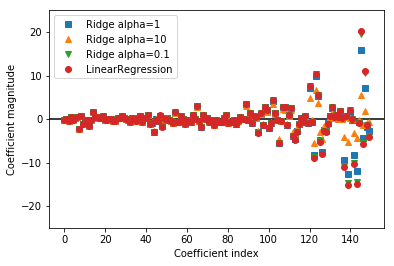

In [31]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

### Lasso

In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.57
Test set score: 0.57
Number of features used: 4


In [33]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.72
Test set score: 0.71
Number of features used: 24


In [34]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.76
Test set score: 0.75
Number of features used: 148


Text(0,0.5,'Coefficient magnitude')

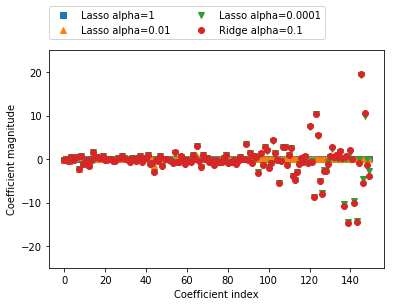

In [35]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

### DecisionTree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(X_train, y_train)
print("Training set score: {:.2f}".format(tree.score(X_train, y_train)))
print("Test set score: {:.2f}".format(tree.score(X_test, y_test)))

Training set score: 0.94
Test set score: 0.93


### RandomForest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor().fit(X_train, y_train)
print("Training set score: {:.2f}".format(rfr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rfr.score(X_test, y_test)))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Training set score: 0.94
Test set score: 0.93


### Gradient Boosted Regression

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gbtr = GradientBoostingRegressor().fit(X_train, y_train)
print("Training set score: {:.2f}".format(gbtr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(gbtr.score(X_train, y_train)))

Training set score: 0.93
Test set score: 0.93


### Summary

In [39]:
decision=pd.DataFrame({'Reg_Types':['kNeighbors_3','kNeighbors_10','kNeighbors_15','Linear_Reg','Ridge_1','Ridge_10','Ridge_0.1',
                                    'lasso','lasso001','lasso00001','Decision_Tree','Random_Forest',
                              'Gradient_Boosted'],'Test':[.89,0.92,0.93,0.75,0.75,0.75,0.75,0.57,
                                                         0.71,0.75,0.93,0.93,0.93]})
decision

,Reg_Types,Test
0,kNeighbors_3,0.89
1,kNeighbors_10,0.92
2,kNeighbors_15,0.93
3,Linear_Reg,0.75
4,Ridge_1,0.75
5,Ridge_10,0.75
6,Ridge_0.1,0.75
7,lasso,0.57
8,lasso001,0.71
9,lasso00001,0.75


barrels08 (annual petroleum consumption in barrels for fuelType1 (1)) is continuous and it was considered as the reponse variable for the regression analysis under supervised learning
From the table above,lasso had the lowest test score of 0.57 while
kNeighbors_15,Decision_Tree,Random_Forest,Gradient_Boosted both had the highest test score(0.57), hence we can assume any of these as the best model for predicting barrels08 respectivley.

In future study, I will be exploring some clustering, association and seriation analysis
for the  Vehicle Fuel Economy data under unsupervised learning.